<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/TC4033_Activity3a_ID01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings
### **Team 1**:
- Alexis Hernández Martínez A01016308
- Rigoberto Vega Escudero A01793132
- Rodrigo Rodríguez Rodríguez A01183284
- Andrea Carolina Treviño Garza A01034993

<br>

### **Activity 3a: Exploring Word Embeddings with GloVe and Numpy**
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries:
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [6]:
# First we save the path and the dimension of our GloVe embedding vectors:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'glove.6B.50d.txt'
emb_dim = 50

In [7]:
# Create a fuction for creating a dictionary with the embeddings:
def create_emb_dictionary(path):
    embeddings_dict1 = {}
    with open(PATH, 'r', encoding='utf-8') as f:
      for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],'float32')
        embeddings_dict1[word] = vector
    return embeddings_dict1

In [5]:
# Here we create the dictionary:
embeddings_dict = create_emb_dictionary(PATH)

In [8]:
# Let's validate that our variable is dictionary type:
type(embeddings_dict)

dict

In [9]:
# Serialize (save dictionary as pickle file)
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f, pickle.HIGHEST_PROTOCOL)

In [10]:
# Deserialize (load the dictionaty from the pickle file)
with open('embeddings_dict_50D.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

In [11]:
# Let's see how it looks one of the items of our Embeddings dictionary:
print(list(embeddings_dict.items())[87])

('three', array([ 0.40545 ,  0.43805 ,  0.36237 ,  0.25683 ,  0.38254 ,  0.68255 ,
       -0.97853 ,  0.12741 , -0.46129 , -0.54809 , -0.35384 , -0.56697 ,
       -0.65756 ,  0.50184 ,  0.53248 , -0.77956 , -0.089944, -0.37572 ,
       -1.1097  , -0.30734 , -0.022657,  0.11632 ,  0.67704 , -0.051499,
       -0.59719 , -1.02    ,  0.24289 , -0.60216 , -0.35183 , -0.54053 ,
        3.9844  ,  0.41521 ,  0.040419,  0.26909 ,  1.1193  ,  0.52924 ,
        0.37308 ,  0.28924 , -0.14714 ,  0.23566 , -0.72709 ,  0.053276,
        0.45373 ,  0.20374 , -0.13384 ,  0.015313, -0.22037 , -0.15662 ,
       -0.30289 , -0.77536 ], dtype=float32))


#### See some embeddings

In [ ]:
# Fuction for showing some embeddings:
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
# Here we can see the first 5 embeddings:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [ ]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
  FUNC = func(n_components=2, random_state = 0)
  words = words2show
  vectors = [embeddings_dict[word] for word in words]
  Y = FUNC.fit_transform(np.array(vectors[:emb_dim]))
  plt.scatter(Y[:, 0], Y[:, 1])

  for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
  plt.show()

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
        'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
        'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
        'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
        'school', 'work', 'university', 'highschool']


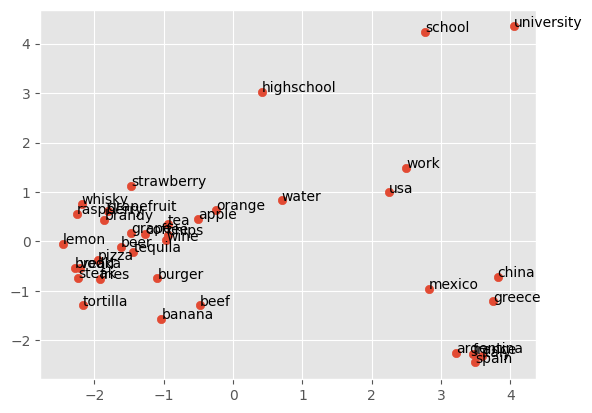

In [ ]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

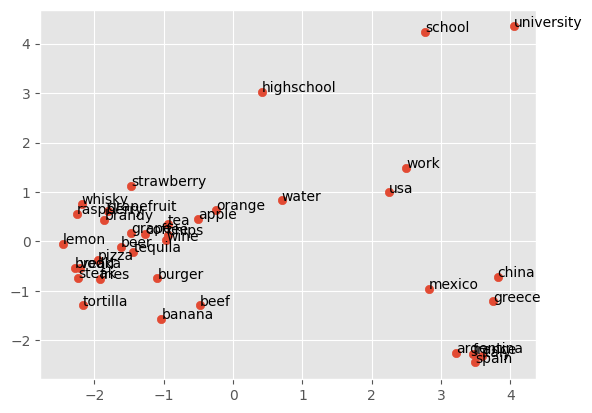

In [ ]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

### Let us compute analogies

In [ ]:
# analogy
def cosine_similarity(vec_a, vec_b):
    """
    Calculate the cosine similarity between two vectors.
    """
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

def analogy(word1, word2, word3, embeddings_dict):
    """
    Solve the analogy word1:word2 :: word3:word4.
    """
    # Retrieve word embeddings
    vec1 = embeddings_dict.get(word1)
    vec2 = embeddings_dict.get(word2)
    vec3 = embeddings_dict.get(word3)

    # Check if all words are in the embeddings dictionary
    if vec1 is None or vec2 is None or vec3 is None:
        missing_words = [word for word, vec in zip([word1, word2, word3], [vec1, vec2, vec3]) if vec is None]
        return f"Missing embeddings for: {', '.join(missing_words)}"

    # Compute the relationship vector
    relationship_vector = vec2 - vec1

    # Find the most similar word
    max_similarity = -1
    result_word = None
    for word, vec in embeddings_dict.items():
        if word not in {word1, word2, word3}:
            similarity = cosine_similarity(relationship_vector, vec - vec3)
            if similarity > max_similarity:
                max_similarity = similarity
                result_word = word

    return result_word

In [ ]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [ ]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the 'top_n' most similar words to the given word based on word embeddings.
    """
    # Retrieve the embedding of the input word
    input_vec = embeddings_dict.get(word)

    # Check if the input word is in the embeddings dictionary
    if input_vec is None:
        return f"Missing embeddings for: {word}"

    # Calculate similarities
    similarities = {}
    for other_word, other_vec in embeddings_dict.items():
        if other_word != word:
            similarity = cosine_similarity(input_vec, other_vec)
            similarities[other_word] = similarity

    # Sort words based on similarity in descending order and select the top 'top_n' words
    most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar_words

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
